In [43]:
from keras.models import Sequential
from keras.layers import Dense , Flatten , Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import os

In [4]:
import numpy as np
import random
import cv2
from sklearn.preprocessing import LabelEncoder

In [5]:
path=r"C:\Users\abhin\ML Lab\CNN\archive\kagglecatsanddogs_3367a\PetImages"
categories=os.listdir(path)
data=[]
for cat in categories:
    temp_path=os.path.join(path,cat)
    for i in os.listdir(temp_path)[:100]:
        arr=cv2.imread(os.path.join(temp_path,i))
        arr=cv2.resize(arr,(200,200))
        data.append([arr,cat])
random.shuffle(data)

In [6]:
x=np.array([i[0] for i in data])
y=[i[1] for i in data]
x=x.reshape(-1,200,200,3)
x=x.astype("float32")

In [7]:

le=LabelEncoder()
y=le.fit_transform(y)
y=np.array(y)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,np.array(y),test_size=0.2)

In [163]:
print(len(x))

100


In [11]:
callback=EarlyStopping(monitor="loss",patience=3)

In [57]:
model=Sequential()
model.add(Flatten(input_shape=(200,200,3)))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32,activation="relu",kernel_regularizer="l2"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=10,callbacks=[callback])
model.evaluate(x_test,y_test,batch_size=32,verbose=0)


Epoch 1/10
3/3 [==============================] - 1s 36ms/step - loss: 2811.2185 - accuracy: 0.4625
Epoch 2/10
3/3 [==============================] - 0s 37ms/step - loss: 2677.7266 - accuracy: 0.4500
Epoch 3/10
3/3 [==============================] - 0s 36ms/step - loss: 2527.6187 - accuracy: 0.5125
Epoch 4/10
3/3 [==============================] - 0s 38ms/step - loss: 2314.8364 - accuracy: 0.4000
Epoch 5/10
3/3 [==============================] - 0s 36ms/step - loss: 1266.6335 - accuracy: 0.5625
Epoch 6/10
3/3 [==============================] - 0s 36ms/step - loss: 892.8121 - accuracy: 0.5625
Epoch 7/10
3/3 [==============================] - 0s 36ms/step - loss: 1054.9432 - accuracy: 0.4875
Epoch 8/10
3/3 [==============================] - 0s 38ms/step - loss: 720.1783 - accuracy: 0.5625
Epoch 9/10
3/3 [==============================] - 0s 37ms/step - loss: 496.7046 - accuracy: 0.5625
Epoch 10/10
3/3 [==============================] - 0s 36ms/step - loss: 213.2487 - accuracy: 0.5125


[184.5908966064453, 0.44999998807907104]

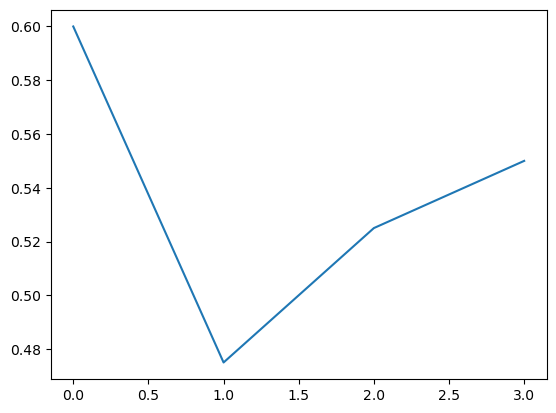

In [56]:
plt.plot(history.history["accuracy"])

In [22]:
import matplotlib.pyplot as plt

In [52]:
from sklearn.metrics import classification_report 
print(classification_report(y_pred=preds,y_true=y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      1.00      0.71        11

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



D:\PYTHON\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\PYTHON\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\PYTHON\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
path=input("Enter the Path of the image")
img_arr=cv2.imread(path)
img_arr=cv2.resize(img_arr,(200,200))
x_pred=np.array(img_arr).reshape(-1,200,200,3).astype("float32")
preds=model.predict(x_pred)
cv2.imshow(img_arr)
print(preds)

Enter the Path of the imageC:\Users\abhin\ML Lab\CNN\archive\kagglecatsanddogs_3367a\PetImages\Dog\88.jpg


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
